# Fit the complete data (V6 with the data with the wanted cuts)
- New:
    - We take into account the component $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - No additive cuts (only the cun $143<\Delta M < 148$)

- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$
    - Background $B^0 \to D^{*-} D_s^+$ with simultaneous fit on $m(D_s\to 3\pi)$
    - Background of misidentified pions: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$
    - Combinatorial background (exponential)

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
with open(f'{loc.JSON}/MC_cutallPIDK_params.json', 'r') as f:
    MC_param_results = json.load(f)

with open(f'{loc.JSON}/data_KPiPi_2_params.json', 'r') as f:
    data_KPiPi_params = json.load(f)

with open(f'{loc.JSON}/data_strip_p/all_data_strip_params.json', 'r') as f:
    mu2_p = json.load(f)['mu2']
    
for var in 'muL', 'muR', 'sigmaL', 'sigmaR': # conversion GeV -> MeV
    data_KPiPi_params[var] = data_KPiPi_params[var]*1000
    data_KPiPi_params[f"{var}_err"] = data_KPiPi_params[f"{var}_err"]*1000

In [3]:
df = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M','tau_M'],
                            cut_DeltaM=True)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/data_strip/all_data_strip.root


In [4]:
name_data = 'all_data_strip_cutDeltaM_V7.2'

## Distributions

### $\Delta M$ distribution

In [5]:
# df_DeltaM = fct.load_data(years, magnets, type_data='data_strip', vars=['Dst_M','D0_M'])
# df_DeltaM["Delta_M"] = df_DeltaM["Dst_M"] - df_DeltaM["D0_M"]
# fct.plot_hist({name_data: df_DeltaM},'Delta_M', '$\Delta M$', 'MeV/$c^2$', name_folder = name_data, colors='black')

### Init

In [6]:
# mass of Ds: 1,968 MeV
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M

In [7]:
n_events_B0_M = {}
d_initial_values = {}
n_Ds = {}
low = 5150.
high = 5550.

### Distribution $m(D_s\to3\pi)$

In [ ]:
fct.plot_hist_particle({name_data:df},'tau_M',
              low = low_tau_M, high = high_tau_M,
              n_bins = 100, mode_hist = False, colors='black')

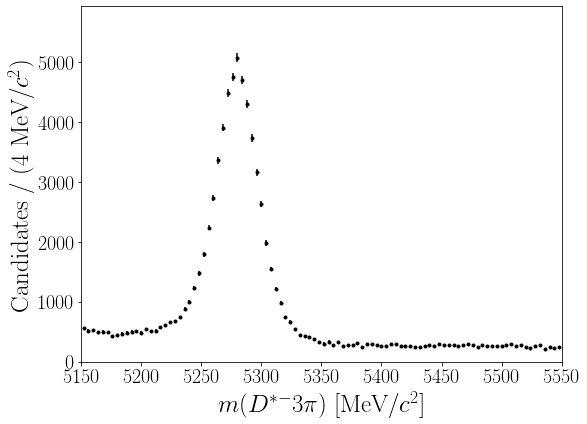

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_all_data_strip_cutDeltaM_V7_B0_cut.pdf


In [9]:
fct.plot_hist_particle({name_data+'_B0_cut':df},'B0_M',
              low = low, high = high,
              n_bins = 100, mode_hist = False, colors='black')

## Simultaneous fit on $m(D_s\to3\pi)$ and $m(B^0)$

### Values for the fit $m(D_s\to3\pi)$

In [8]:
n_events_tau_M = len(df.query(f'tau_M > {low_tau_M} and tau_M < {high_tau_M}'))

In [9]:
initial_values_tau = { # it seems that this one works with almost every BDT cut....
    'mu_tau': {
        'value' : 1969.,
        'low': 1965.,
        'high': 1975.,     
    },
    'sigma_tau': {
        'value' : 9.4,
        'low': 5.,
        'high': 15.,
    },
    'n_bkg_tau': {
        'value' : 15000,
        'low': 0,
        'high': n_events_tau_M,  
    },
    'n_sig_tau': {
        'value' : 7000,
        'low': 0,
        'high': n_events_tau_M,  
    },
    'lambda_tau': {
        'value' : -0.003,
        'low': -0.01,
        'high': -0.0001  
    }
}

# n_sig_tau         6943     +/- 1.2e+02  -1.2e+02   +1.2e+02       False
# n_bkg_tau        15540     +/- 1.5e+02  -1.5e+02   +1.5e+02       False
# mu_tau            1969     +/-    0.17  -   0.17   +   0.17       False
# sigma_tau         9.41     +/-    0.17  -   0.17   +   0.17       False
# lambda_tau   -0.003044     +/- 0.00018  -0.00018   +0.00018       False

### Values for the fit $m(B^0)$

In [10]:
n_events_B0_M = len(df.query(f'B0_M > {low} and B0_M < {high}'))

# n_sig            45920     +/- 3.7e+02  -3.9e+02   +3.7e+02       False
# n_bkg            29790     +/- 5.4e+02  -5.1e+02   +5.3e+02       False
# n_bkg2           443.3     +/- 1.3e+02  -1.2e+02   +1.6e+02       False
# n_bkgK            2718     +/- 3.2e+02  -3.2e+02   +3.2e+02       False
# frac            0.4756     +/-   0.054  -  0.058   +  0.054       False
# mu                5280     +/-     0.1  -    0.1   +    0.1       False
# nL                   7     +/-  0.0061  -   0.93   +   0.67        True
# sigmaL           13.98     +/-    0.46  -   0.53   +   0.46       False
# nR                  15     +/-     2.1  -     14   +     13        True
# sigmaR           23.36     +/-    0.66  -   0.65   +   0.78       False
# lambda      -0.0008809     +/- 0.00016  -0.00014   +0.00014       False
# sigma2           36.01     +/-     6.1  -    5.7   +    7.6       False


n_sig_k = 48000
n_bkg_k = 29000
n_bkg2_k = 1300
n_bkgK_k = 900



initial_values = {
    'mu'       :{ 'value': 5279.                         , 'low': 5279.-5.       , 'high': 5279.+5.             , 'floating': True},
    'sigmaL'   :{ 'value': 17.9                          , 'low': 17.-8.         , 'high': 17.+8.               , 'floating': True},
    'sigmaR'   :{ 'value': 17.9                          , 'low': 17.-8.         , 'high': 17.+8.               , 'floating': True},
    'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': None           , 'high': None                 , 'floating': False},
    'alphaR'   :{ 'value': -MC_param_results['alphaR_MC'], 'low': -7.            , 'high': -0.5                 , 'floating': True},
    'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': None           , 'high': None                 , 'floating': False},
    'nR'       :{ 'value': MC_param_results['nR_MC']     , 'low': 1.             , 'high': 30.                  , 'floating': True},
    'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    'lambda'   :{ 'value': -0.0006                       , 'low': -0.01          , 'high': -0.00001             , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    'mu2'      :{ 'value': mu2_p                         , 'low': 4800.          , 'high': 5150.                , 'floating': False},
    'sigma2'   :{ 'value': 80.                           , 'low': 10.            , 'high': 5150.-mu2_p          , 'floating': True},
    'n_bkg2'   :{ 'value': n_bkg2_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
    'n_bkgK'   :{ 'value': n_bkgK_k                      , 'low': 0              , 'high': n_events_B0_M        , 'floating': True},
    'frac'     :{ 'value': 1.                            , 'low': 0              , 'high': 10.                  , 'floating': True},
}

for var in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
    initial_values[f'{var}_K'] = {'value': data_KPiPi_params[var], 'low': None, 'high': None, 'floating': False}

In [11]:
MC_param_results['alphaR_MC']

4.245931211431093

## Simultaneous fit

### Observables and variables

In [12]:
obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
zparams_tau = {}


for var_tau in initial_values_tau.keys():
    zparams_tau[var_tau] = zfit.Parameter(var_tau, initial_values_tau[var_tau]['value'], 
                                     initial_values_tau[var_tau]['low'], initial_values_tau[var_tau]['high'])

In [13]:
obs = zfit.Space("x", limits=(low, high))

zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(var,
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])
    #print(zparams[var])

In [14]:
name_params_tau = {
    f'mu_tau':'$\mu_{m_{D_s}}$',
    f'sigma_tau':'$\sigma_{m_{D_s}}$',
    f'n_bkg_tau':'$n_{bkg,c}$',
    f'n_sig_tau':'$n_{sig,D_s}$',
    f'lambda_tau':'$\\lambda$',
}

name_params = {
    f'mu'      : '$\mu$',
    f'sigmaL'  : '$\\sigma_L$',
    f'sigmaR'  : '$\\sigma_R$',    
    f'alphaL'  : '$\\alpha_L$',
    f'alphaR'  : '$\\alpha_R$',
    f'nL'      : '$n_L$',
    f'nR'      : '$n_R$',
    f'n_bkg'   : '$n_{bkg,c}$',
    f'n_sig'   : '$n_{sig,D^*3\pi}$',
    f'lambda'  : '$\\lambda$',
    f'mu2'     : '$\\mu_2$',
    f'sigma2'  : '$\\sigma_2$',
    f'n_bkg2'  : '$n_{bkg,D^*3\pi h}$',
    f'n_bkgK'  : '$n_{bkg,D^*K\pi\pi}$',
    'frac'     : '$f_{S, \\frac{L}{R}}$'
}

### PDFs

In [15]:
gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

data_tau = zfit.Data.from_pandas(df['tau_M'],obs=obs_tau)

In [16]:
def sum_crystalball(muL, muR, sigmaL, sigmaR, alphaL, alphaR, nL, nR, frac, obs):
    crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL,
                                         alphaL,nL,
                                         obs=obs)
    crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR,
                                         alphaR, nR, 
                                         obs=obs)
    
    model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac)
    
    return model, crystalBallL, crystalBallR

In [17]:
model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                          zparams['sigmaL'], zparams['sigmaR'],
                                                          zparams['alphaL'], zparams['alphaR'], 
                                                          zparams['nL'], zparams['nR'],
                                                          frac=zparams['frac'], obs=obs)
model_Ds, crystalBallL_Ds, crystalBallR_Ds = sum_crystalball(zparams['mu'], zparams['mu'],
                                                             zparams['sigmaL'], zparams['sigmaR'],
                                                             zparams['alphaL'], zparams['alphaR'], 
                                                             zparams['nL'], zparams['nR'],
                                                             frac=zparams['frac'], obs=obs)

model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                          zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                          zparams['alphaL_K'], zparams['alphaR_K'], 
                                                          zparams['nL_K'], zparams['nR_K'],
                                                          zparams['fraction_K'], obs=obs)

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)



# sum of the two PDFs
model_S_ext = model_S.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
model_Ds_ext = model_Ds.create_extended(zparams_tau['n_sig_tau'])
model_K_ext = model_K.create_extended(zparams['n_bkgK'])

model = zfit.pdf.SumPDF([model_S_ext, exp_ext, gaussian_ext, model_Ds_ext, model_K_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df['B0_M'], obs=obs)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:443: UserWarning: The function <function Space.limits at 0x7fe663305440> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1890.]]), array([[2050.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7fe66330b830> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1890.]]), array([[2050.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

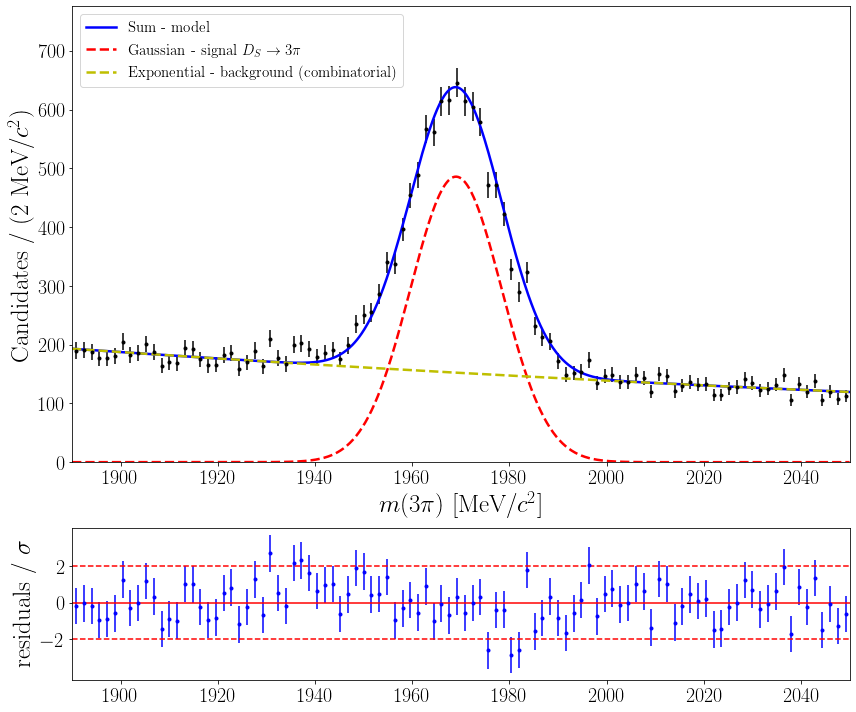

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V7.2_try/tau_M_all_data_strip_cutDeltaM_V7.2_try_fit.pdf


In [18]:
plot_hist_fit_particle(df,'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'], colors = ['b','r','y'],
                       obs=obs_tau, n_bins = 100, mode_hist = False, name_data=name_data+'_try',
                      fontsize_leg=15.)

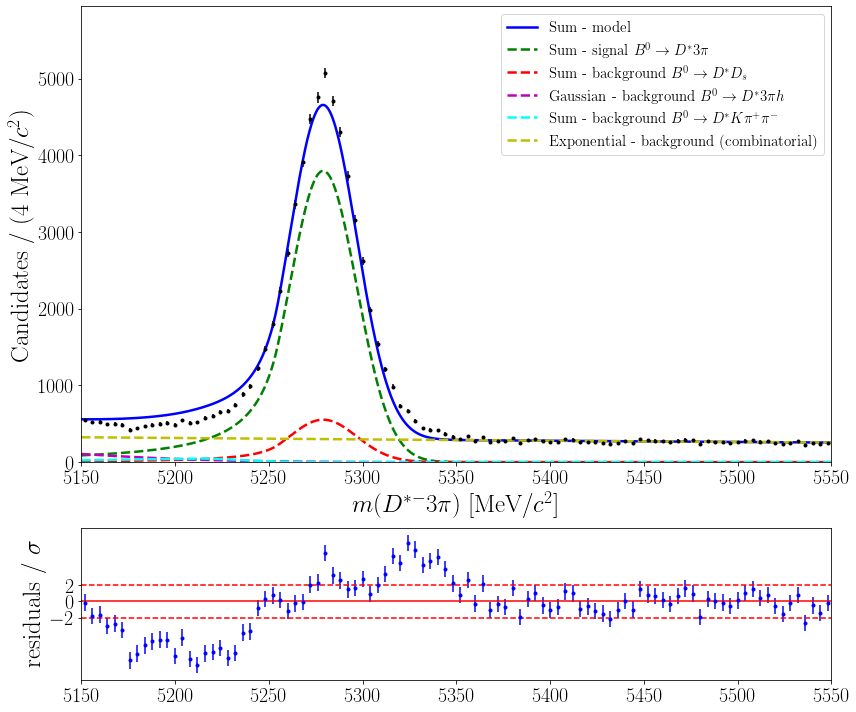

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V7.2_try/B0_M_all_data_strip_cutDeltaM_V7.2_try_fit.pdf


In [19]:
# n_sig_k = 120000
# n_bkg_k = 87000
# n_bkg2_k = 33000

# zparams['n_sig'].set_value(n_sig_k)
# zparams['n_bkg'].set_value(n_bkg_k)
# zparams['n_bkg2'].set_value(n_bkg2_k)
# zparams['n_bkgK'].set_value(n_bkgK_k)

plot_hist_fit_particle(df,'B0_M', models = [model,model_S_ext, model_Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                       name_models = [None, '$B^0\\to D^* 3\pi$','$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$',
                                      '$B^0\\to D^* K \pi^+\pi^-$','(combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False, fontsize_leg=15., colors=['b','g','r','m','cyan','y'],
                       name_data = name_data+'_try', loc_leg='upper right')


# plot_hist_fit_particle(df,'B0_M', models = [model,model_S_ext, model_Ds_ext, gaussian_ext, model_K_ext,exp_ext],
#                        name_models = [None, '$B^0\\to D^* 3\pi$','$B^0\\to D^* 3\pi$ (1)','$B^0\\to D^* 3\pi$ (2)','$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$',
#                                       '$B^0\\to D^* K \pi^+\pi^-$','(combinatorial)'],
#                        obs=obs, n_bins = 100,mode_hist = False, fontsize_leg=15., colors=['b','g','g','g','r','m','cyan','y'],
#                        name_data = name_data+'_try', loc_leg='upper right')

### Fitting

In [20]:
result, params = launch_fit([model_tau, model], [data_tau, data], extended=True) # 3 fits in a row, hahaha :'()

------------------------------------------------------------------
| FCN = -5.178e+05              |    Ncalls=1686 (1686 total)    |
| EDM = 0.000503 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name            value    minuit_hesse         minuit_minos    at limit
----------  ---------  --------------  -------------------  ----------
n_sig_tau        6942     +/- 1.2e+02  -1.2e+02   +1.2

Info: DavidonErrorUpdator: delgam < 0 : first derivatives increasing along search line
Info: VariableMetricBuilder: matrix not pos.def, gdel > 0
Info: gdel = 14.4386
Info in negative or zero diagonal element in covariance matrix : i = 12
Info in added to diagonal of Error matrix a value : dg = 0.510049
Info: gdel = -17266.2


    ------------------------------------------------------------------
    | FCN = -5.178e+05              |    Ncalls=1923 (1923 total)    |
    | EDM = 0.000536 (Goal: 0.001)  |            up = 0.5            |
    ------------------------------------------------------------------
    |  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
    ------------------------------------------------------------------
    |     True      |     True      |   False   |       False        |
    ------------------------------------------------------------------
    | Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
    ------------------------------------------------------------------
    |     False     |     True      |   True    |   True    | False  |
    ------------------------------------------------------------------
    name             value    minuit_hesse         minuit_minos    at limit
    ----------  ----------  --------------  -------------------  ----------
    n_sig_tau         6941     +/- 1.1e+02  -1.1e+02   +1.1e+02       False
    n_bkg_tau        15540     +/- 1.5e+02  -1.5e+02   +1.5e+02       False
    mu_tau            1969     +/-    0.16  -   0.16   +   0.16       False
    sigma_tau         9.41     +/-    0.16  -   0.16   +   0.16       False
    lambda_tau   -0.003039     +/- 0.00018  -0.00018   +0.00018       False
    n_sig            49270     +/-   4e+02  -  4e+02   +  4e+02       False
    n_bkg            26860     +/- 5.3e+02  -5.3e+02   +5.3e+02       False
    n_bkg2            2748     +/- 2.7e+02  -2.7e+02   +2.7e+02       False
    n_bkgK          0.9665     +/-    0.94  -   0.94   +   0.94       False
    frac            0.5875     +/-   0.032  -  0.032   +  0.032       False
    mu                5280     +/-    0.12  -   0.12   +   0.12       False
    sigmaL            15.9     +/-    0.51  -   0.51   +   0.51       False
    alphaR          -1.232     +/-   0.091  -  0.091   +  0.091       False
    nR                  15     +/-    0.11  -    2.4   +    2.4       False
    sigmaR           21.32     +/-    0.77  -   0.77   +   0.77       False
    lambda      -0.0001928     +/- 0.00018  -0.00018   +0.00018       False
    sigma2           92.13     +/-     0.3  -    0.3   +    0.3       False

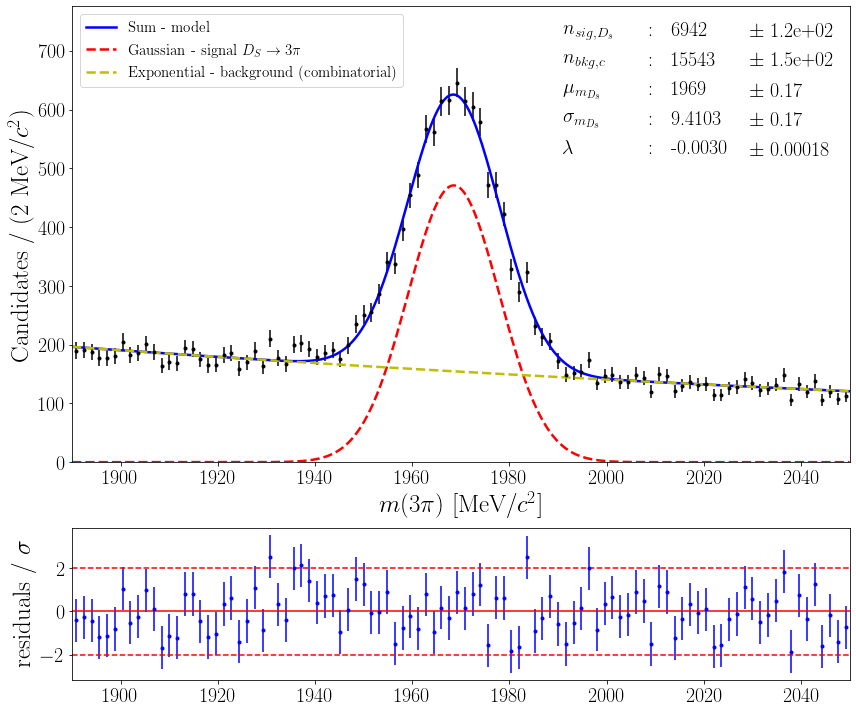

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V7.2/tau_M_all_data_strip_cutDeltaM_V7.2_fit.pdf


In [21]:
plot_hist_fit_particle(df,'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'], colors = ['b','r','y'],
                       obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data, 
                      params=params,name_params=name_params_tau, fontsize_leg=15., colWidths=[0.06,0.01,0.05,0.06])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


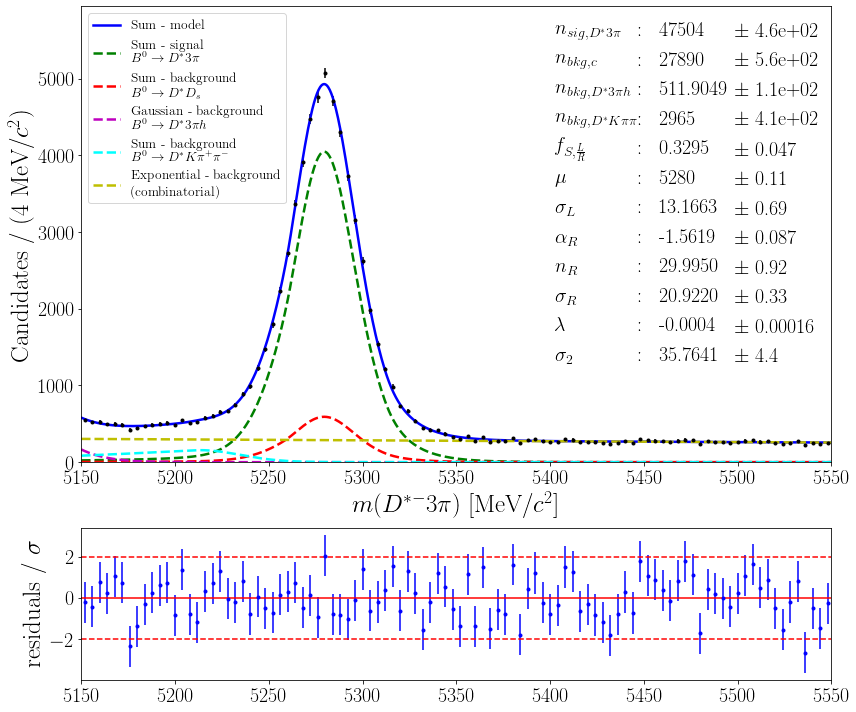

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/all_data_strip_cutDeltaM_V7.2/B0_M_all_data_strip_cutDeltaM_V7.2_fit.pdf


In [22]:
plot_hist_fit_particle(df,'B0_M', models = [model,model_S_ext, model_Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                       name_models = [None, '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data,
                       colors=['b','g','r','m','cyan','y'],
                       params=params,name_params=name_params, fontsize_leg=13.5,
                       colWidths=[0.06,0.01,0.05,0.06])

In [27]:
save_params(params,name_data,True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/all_data_strip_cutDeltaM_V7.2_params.json
